# Temporal-aware Event Camera Stacking Method

## 0. Setting

In [159]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

event_path = '/home/work/main/jpark/Event_camera/data/Town05_sample/Town05_sequence_2/events/'
event_path = '/home/work/main/jpark/Event_camera/data/Town05_sample/Town05_sequence_2/rgb/'
output_path = '/home/work/main/jpark/Event_camera/RAM_Net/checkpoint/pretrained/output/npy/events0/'

## 1. Event Load

In [128]:
event = np.load(os.path.join(event_path, 'voxels', '05_002_0012_voxel.npy'))
print(f'event data: {event.shape}, {event.dtype}, {type(event)}, {np.mean(event)}, {np.max(event)}, {np.min(event)}')
print(event[event != 0][:10])

event data: (5, 256, 512), float32, <class 'numpy.ndarray'>, 0.000254821905400604, 2.346986770629883, -5.351737976074219
[-0.83975995  0.12308077  0.39944986 -0.06206552 -2.1493373  -1.4847713
 -0.53273314 -0.9211803   1.2783195  -0.343936  ]


In [129]:
negativ_input = np.zeros((256,512))
positiv_input = np.zeros((256,512))
zeros_input = np.zeros_like(positiv_input)

for weight, eve in zip([0.2, 0.4, 0.6, 0.8, 1], event):
    negativ = np.where(eve <= -0.6, weight, 0.0)
    positiv = np.where(eve >= 0.6, weight, 0.0)
    negativ_input[negativ != 0 ] = negativ[negativ != 0 ]
    positiv_input[positiv != 0 ] = positiv[positiv != 0 ]
    print(weight, len(negativ_input[negativ != 0 ]), negativ_input[negativ != 0 ].mean()*255.0)
total_image = np.concatenate((negativ_input[:, :, None], zeros_input[:, :, None], positiv_input[:, :, None]), axis=2) * 255
print('total_image:', total_image.shape, total_image.dtype, total_image.mean(), total_image.min(), total_image.max())

0.2 362 50.99999999999999
0.4 784 102.0
0.6 848 152.99999999999997
0.8 907 204.00000000000003
1 535 255.0
total_image: (256, 512, 3) float64 2.5061874389648438 0.0 255.0


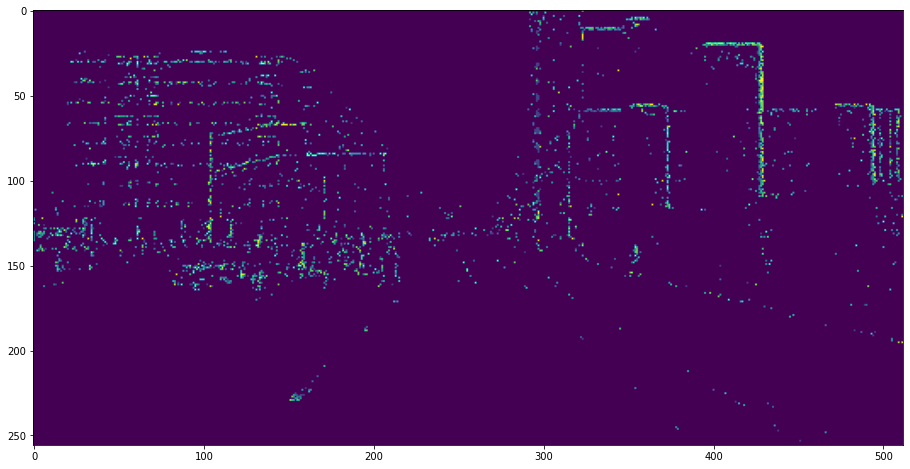

In [130]:
plt.figure(figsize=(20,8))
plt.imshow(positiv_input*255.0)

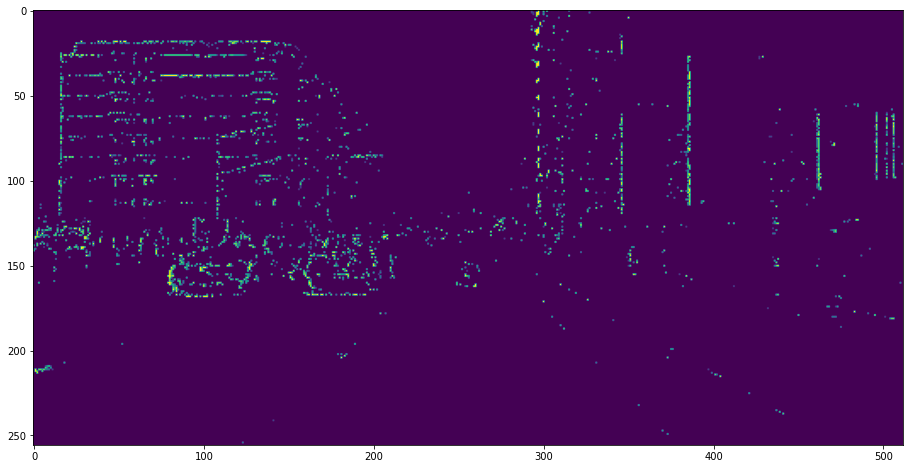

In [131]:
plt.figure(figsize=(20,8))
plt.imshow(negativ_input*255.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


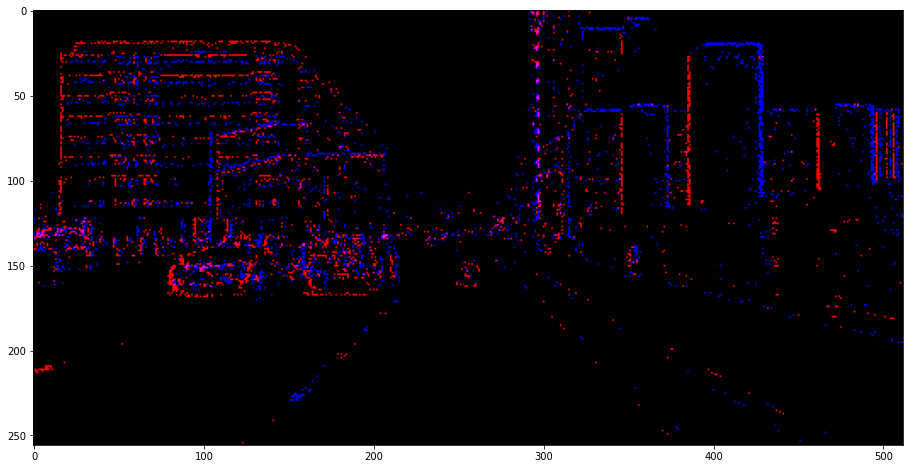

In [132]:
plt.figure(figsize=(20,8))
plt.imshow(total_image)

In [133]:
red = [(50,0,0), (100,0,0), (150,0,0),  (255, 165, 0), (255,0,0)]
blue = [(0,0,50), (0,0,100), (0,0,150), (0,0,200), (0,0,255)]

In [134]:
print(np.log(1), np.log(125))

0.0 4.8283137373023015


In [135]:
pallete = np.zeros((256,512,5))

for i, (weight, eve) in enumerate(zip([0,5,10,15,20], event)):
    eve = np.where(eve <= -0.6, eve-weight, eve)
    eve = np.where(eve >= 0.6, eve+weight, eve)
    pallete[:,:,i] = eve
    print(weight, eve.mean(), eve.min(), eve.max(), eve.std(), '활성 비율:', ((np.sum(eve <= -0.6) + np.sum(eve >= 0.6))/(256*512)).round(4))
print('pallete:', pallete.shape, pallete.dtype, pallete.mean(), pallete.min(), pallete.max())

0 0.0011157118 -3.2607152 2.3469868 0.08207229 활성 비율: 0.0067
5 0.0054913587 -9.100325 6.9430857 0.66720176 활성 비율: 0.0129
10 0.0018244006 -14.452614 12.273018 1.246791 활성 비율: 0.0131
15 0.0030781475 -20.351738 17.067917 1.8797419 활성 비율: 0.014
20 -0.012943944 -24.705227 21.958439 1.8153962 활성 비율: 0.0076
pallete: (256, 512, 5) float64 -0.0002868652468024591 -24.70522689819336 21.958438873291016


In [136]:
pallete = event.swapaxes(0,1).swapaxes(1,2)
pallete.shape

(256, 512, 5)

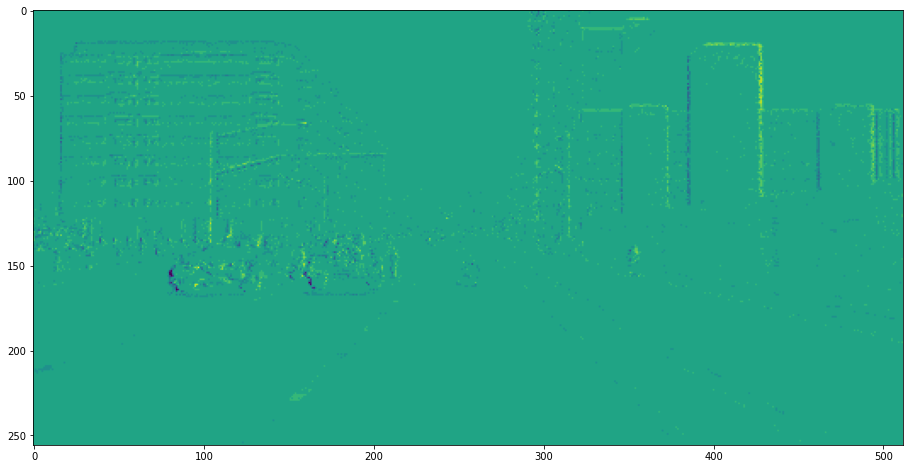

In [137]:
plt.figure(figsize=(20,8))
plt.imshow(np.sum(pallete, axis=2))

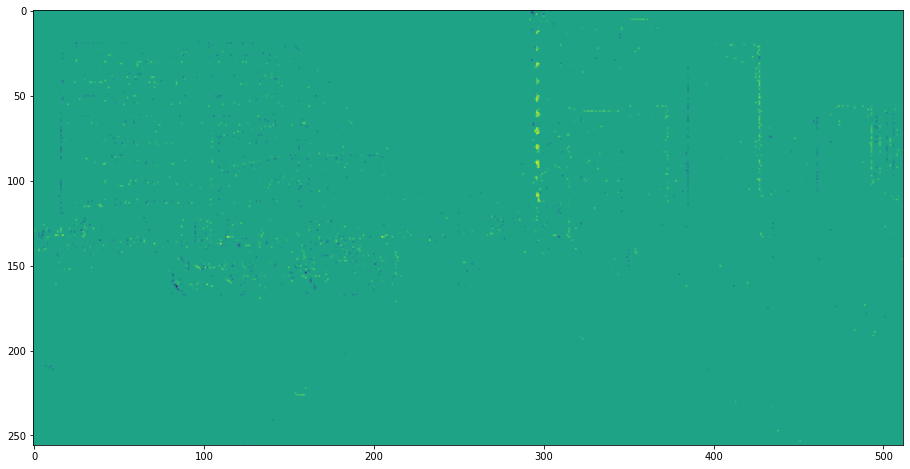

In [138]:
plt.figure(figsize=(20,8))
plt.imshow(pallete[:,:,0])

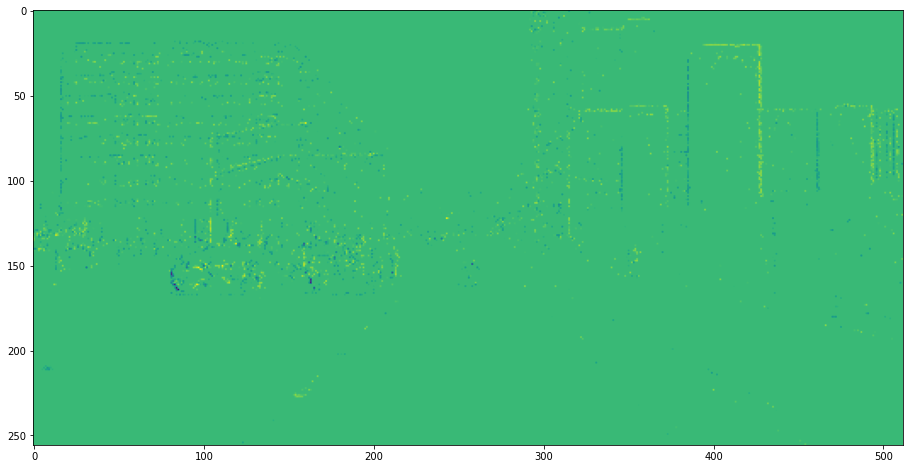

In [139]:
plt.figure(figsize=(20,8))
plt.imshow(pallete[:,:,1])

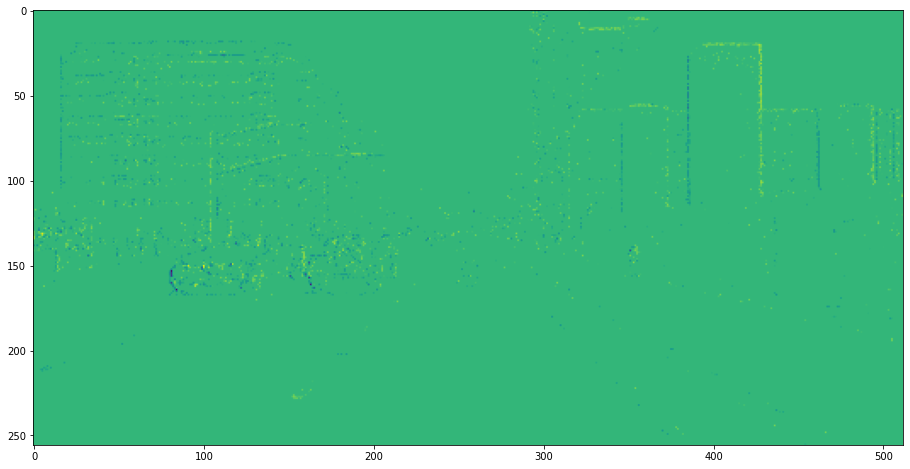

In [140]:
plt.figure(figsize=(20,8))
plt.imshow(pallete[:,:,2])

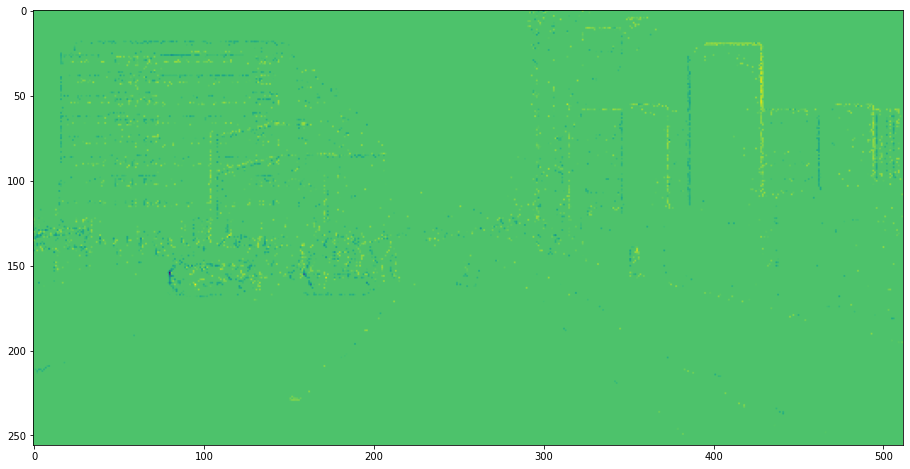

In [141]:
plt.figure(figsize=(20,8))
plt.imshow(pallete[:,:,3])

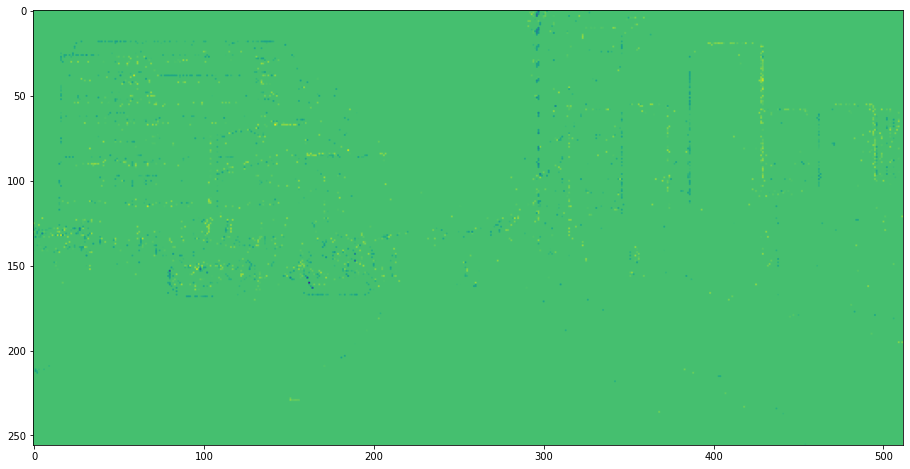

In [142]:
plt.figure(figsize=(20,8))
plt.imshow(pallete[:,:,4])

## 230727

In [143]:
event = np.load(os.path.join(event_path, 'voxels', '05_002_0012_voxel.npy'))
print(f'event data: {event.shape}, {event.dtype}, {type(event)}, {np.mean(event)}, {np.max(event)}, {np.min(event)}')
print(event[event != 0][:10])

event data: (5, 256, 512), float32, <class 'numpy.ndarray'>, 0.000254821905400604, 2.346986770629883, -5.351737976074219
[-0.83975995  0.12308077  0.39944986 -0.06206552 -2.1493373  -1.4847713
 -0.53273314 -0.9211803   1.2783195  -0.343936  ]


In [152]:
negativ_input = np.zeros((256,512))
positiv_input = np.zeros((256,512))
zeros_input = np.zeros_like(positiv_input)
timestamp_image_list = []

for weight, eve in zip([0.2, 0.4, 0.6, 0.8, 1], event):
    if weight == 0.6:
        break
    negativ = np.where(eve <= -0.6, weight, 0.0)
    positiv = np.where(eve >= 0.6, weight, 0.0)
    negativ_input[negativ != 0 ] = negativ[negativ != 0 ]
    positiv_input[positiv != 0 ] = positiv[positiv != 0 ]
    print(weight, len(negativ_input[negativ != 0 ]), negativ_input[negativ != 0 ].mean()*255.0)
    
    timestamp_image = np.concatenate((negativ[:, :, None], zeros_input[:, :, None], positiv[:, :, None]), axis=2) * 255
    timestamp_image_list.append(timestamp_image)
total_concat_image = np.concatenate((negativ_input[:, :, None], zeros_input[:, :, None], positiv_input[:, :, None]), axis=2) * 255
print('total_concat_image:', total_concat_image.shape, total_concat_image.dtype, total_concat_image.mean(), total_concat_image.min(), total_concat_image.max())
print('timestamp_image_list:',len(timestamp_image_list))

0.2 362 50.99999999999999
0.4 784 102.0
total_concat_image: (256, 512, 3) float64 0.5370864868164062 0.0 102.0
timestamp_image_list: 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


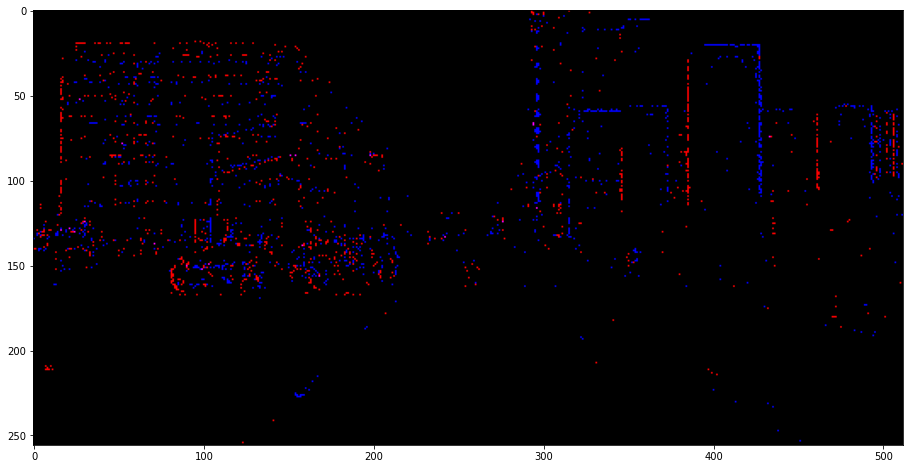

In [158]:
plt.figure(figsize=(20,8))
plt.imshow(total_concat_image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


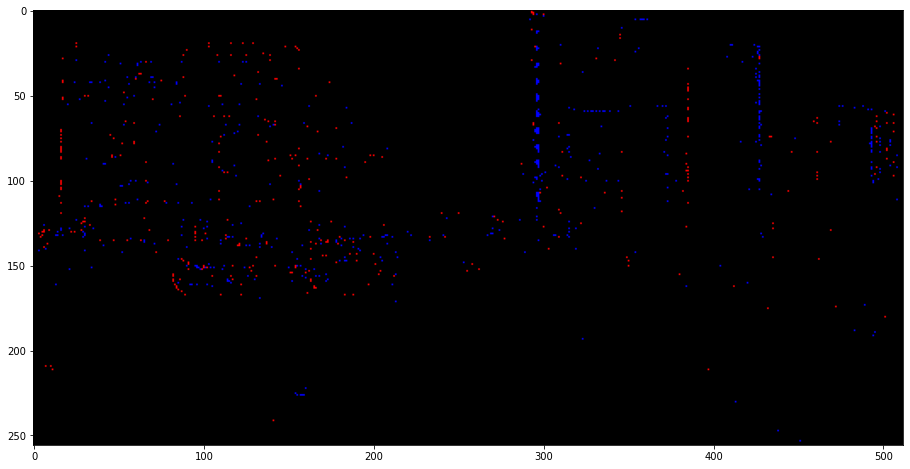

In [154]:
plt.figure(figsize=(20,8))
plt.imshow(timestamp_image_list[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


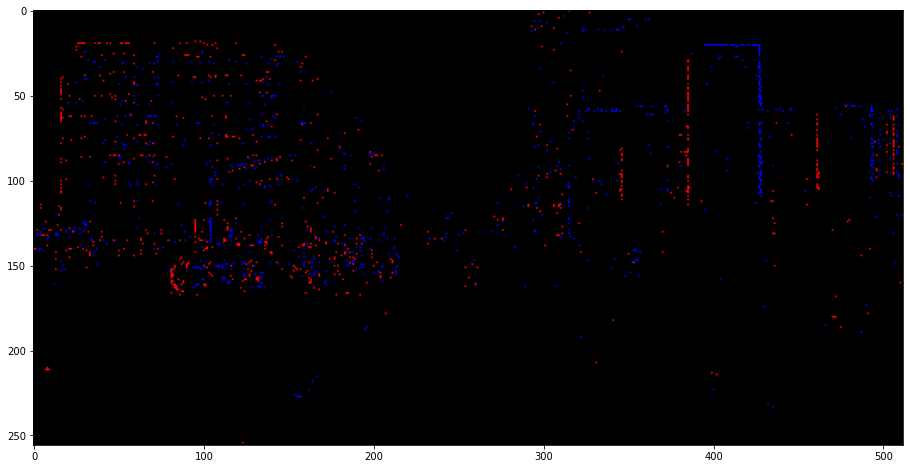

In [155]:
plt.figure(figsize=(20,8))
plt.imshow(timestamp_image_list[1])
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(timestamp_image_list[2])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


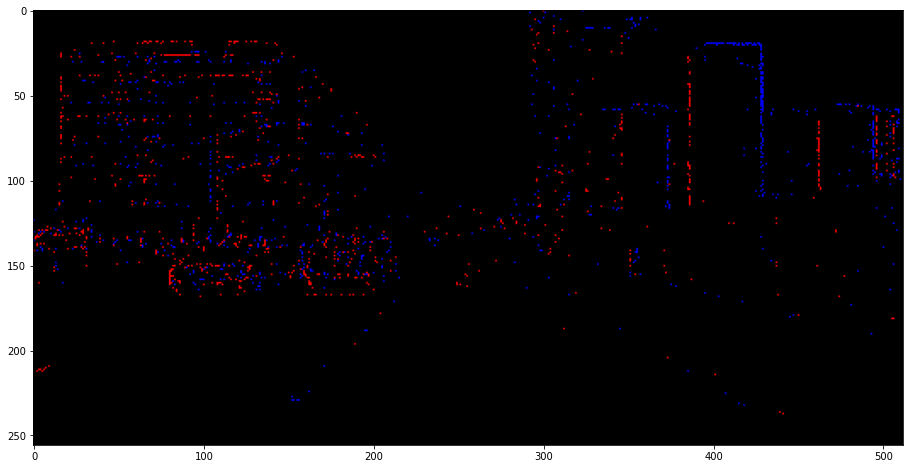

In [149]:
plt.figure(figsize=(20,8))
plt.imshow(timestamp_image_list[3])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


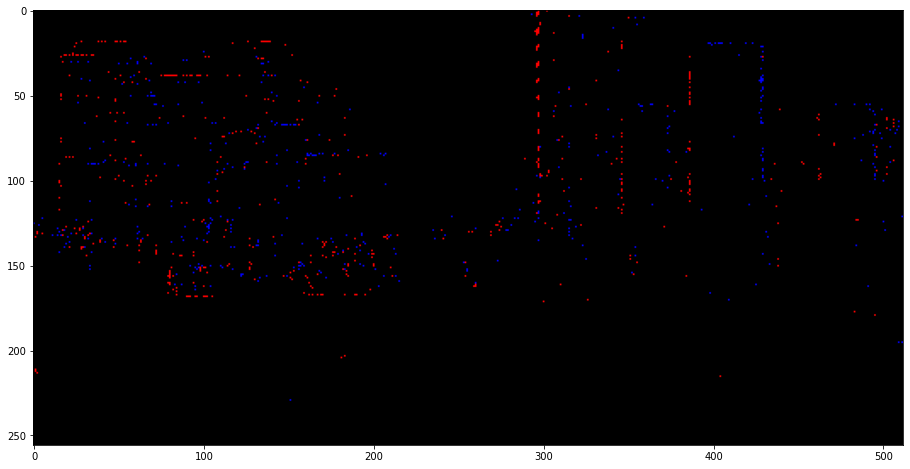

In [150]:
plt.figure(figsize=(20,8))
plt.imshow(timestamp_image_list[4])
plt.show()